<a href="https://colab.research.google.com/github/atul1996810/DL/blob/main/Multiclass_classification_with_kersa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass classification

## Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_train%20(1).csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
df.shape

(2000, 21)

In [4]:
# missing data
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [5]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated rows in this data

## Separate X and Y
  Y => Price range
    0=> cheap
    1=> good pricing
    2=> costly
    3=> too expensive

In [6]:
X =df.drop(columns=['price_range'])
Y = df[["price_range"]]

In [7]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [8]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


<Axes: xlabel='price_range'>

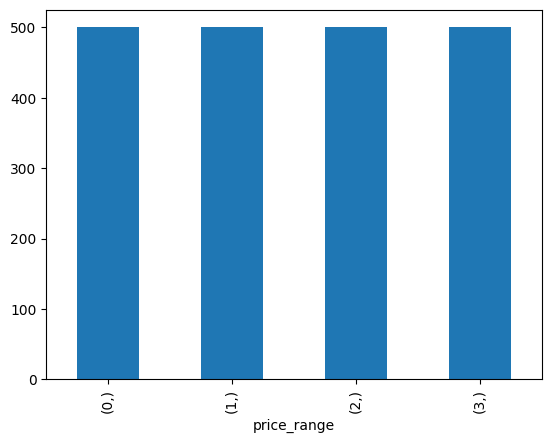

In [9]:
Y.value_counts().plot(kind='bar')

## Perform preprocessing and data cleaning

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [11]:
num_pipe = make_pipeline(
    StandardScaler(),
    SimpleImputer(strategy='median')
).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Split the data into training and testing

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=42)

In [14]:
xtrain.shape

(1600, 20)

In [15]:
xtest.shape

(400, 20)

In [16]:
ytrain.shape

(1600, 1)

In [17]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


## Preprocess the categorical feature- Y : Multiclass classification

In [18]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [19]:
ytrain_cat[:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

## Model Building

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from keras.callbacks import EarlyStopping

## Early Stopping

In [21]:
# Intialize the model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the hidden layers
model.add(Dense(units=64,activation='relu'))

# add the dropout layer
model.add(Dropout(rate=0.4))

# Add another hidden layers
model.add(Dense(units=32,activation='relu'))

# add the dropout layer
model.add(Dropout(rate=0.2))

# output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
es = EarlyStopping(monitor='val_loss',patience=10)

In [25]:
hist = model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3062 - loss: 1.4894 - val_accuracy: 0.3969 - val_loss: 1.2957
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3360 - loss: 1.3625 - val_accuracy: 0.5188 - val_loss: 1.1906
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4155 - loss: 1.2000 - val_accuracy: 0.5625 - val_loss: 1.0602
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5563 - loss: 1.0636 - val_accuracy: 0.6219 - val_loss: 0.9182
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5890 - loss: 0.9271 - val_accuracy: 0.6656 - val_loss: 0.7906
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6356 - loss: 0.8471 - val_accuracy: 0.7812 - val_loss: 0.6887
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6744 - loss: 0.7617 - val_accuracy: 0.7844 - val_loss: 0.6096
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 0.6860 - val_accuracy: 0.8313 - 

In [26]:
model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0494


[0.07471249252557755, 0.9800000190734863]

In [27]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9261 - loss: 0.1478


[0.16877400875091553, 0.9275000095367432]

## Plot the learning curve

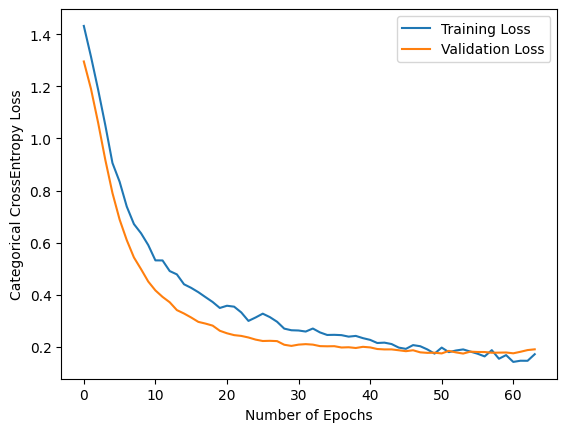

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Categorical CrossEntropy Loss")
plt.show()

## Evaluate the model

In [29]:
ytest_probs = model.predict(xtest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [30]:
ytest_probs[:5]

array([[9.8445547e-01, 1.5544524e-02, 3.5755174e-10, 4.1072299e-26],
       [5.2814970e-12, 1.6679229e-02, 9.8316473e-01, 1.5604547e-04],
       [4.4511538e-03, 9.9490070e-01, 6.4817228e-04, 2.7166970e-13],
       [4.9195147e-39, 1.5043813e-13, 1.9794821e-03, 9.9802053e-01],
       [5.6764326e-05, 9.9164212e-01, 8.3010877e-03, 2.9798577e-09]],
      dtype=float32)

In [31]:
import numpy as np
np.max(ytest_probs,axis=1)

array([0.98445547, 0.9831647 , 0.9949007 , 0.9980205 , 0.9916421 ,
       0.9948961 , 0.745261  , 0.9942954 , 0.94947124, 0.9321158 ,
       0.9817069 , 0.62794936, 0.9947594 , 0.99914896, 0.51230454,
       0.9695895 , 0.99575245, 0.99914443, 0.9981457 , 0.9918121 ,
       0.99646485, 0.6705807 , 0.51636815, 0.9868047 , 0.99593264,
       0.96812046, 0.79452354, 0.7000061 , 0.9939008 , 0.99702674,
       0.9756176 , 0.9994326 , 0.9960939 , 0.9776368 , 0.9707064 ,
       0.9878419 , 0.97917455, 0.9553007 , 0.9994661 , 0.89072174,
       0.619042  , 0.9297433 , 0.9920907 , 0.9966023 , 0.7328404 ,
       0.7897755 , 0.9840141 , 0.9375424 , 0.99504036, 0.9930294 ,
       0.9998091 , 0.98746014, 0.99458283, 0.99196917, 0.9069096 ,
       0.8292802 , 0.9833831 , 0.82608044, 0.99808735, 0.9967249 ,
       0.94994134, 0.9990841 , 0.9126392 , 0.99761766, 0.9711925 ,
       0.9063594 , 0.9996252 , 0.9989567 , 0.9986089 , 0.9853662 ,
       0.9730112 , 0.98202455, 0.9976164 , 0.99475044, 0.98297

In [32]:
np.argmax(ytest_probs,axis=1)

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       0, 2, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 3, 1, 0, 0, 3, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 2, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 2, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 1, 3, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [33]:
import numpy as np
ypreds_test = np.argmax(ytest_probs,axis=1)

In [34]:
ypreds_test[:5]

array([0, 2, 1, 3, 1])

In [35]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


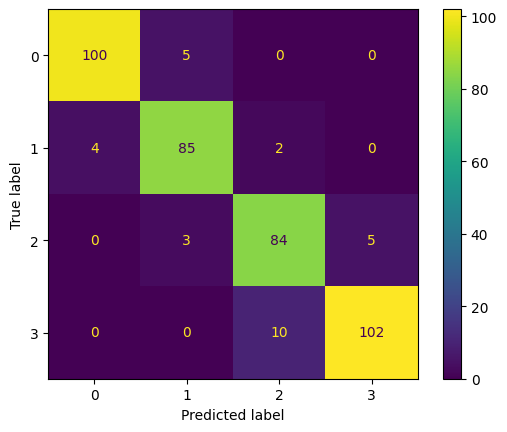

In [36]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cf = confusion_matrix(ytest,ypreds_test)
ConfusionMatrixDisplay(cf).plot()

In [37]:
print(classification_report(ytest,ypreds_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.91      0.93      0.92        91
           2       0.88      0.91      0.89        92
           3       0.95      0.91      0.93       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



## Above model can be considered for out of sample predictions as the model accuracy is greater than 0.8

## Save the model

In [38]:
model.save("MobilePriceClassification.keras")

## Load the above model

In [39]:
from keras.models import load_model

In [40]:
m = load_model('/content/MobilePriceClassification.keras')
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

In [41]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_test%20(1).csv')
df2.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [42]:
df2 = df2.drop(columns='id')

In [43]:
xnew_pre = num_pipe.transform(df2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


## Final predictions

In [44]:
probs = model.predict(xnew_pre)
probs[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[2.9091224e-26, 3.2663056e-08, 2.7793801e-01, 7.2206199e-01],
       [8.8402413e-36, 3.0952699e-11, 2.2729054e-02, 9.7727090e-01],
       [2.8978395e-21, 3.2942057e-06, 9.0443838e-01, 9.5558390e-02],
       [3.3631163e-44, 3.3744414e-15, 5.5928988e-04, 9.9944073e-01],
       [3.5996276e-03, 9.9129921e-01, 5.1011601e-03, 4.1825912e-09]],
      dtype=float32)

In [45]:
final_preds = np.argmax(probs,axis=1)
final_preds[:5]

array([3, 3, 2, 3, 1])

In [46]:
df2["Price_Range"] = final_preds

In [47]:
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


## Save the classification results to a csv file

In [48]:
df2.to_csv("MobilePrice predictions.csv")